# 🐦 Twitter Sentiment Analysis using TextBlob

This project analyzes the sentiment of tweets using the TextBlob NLP library. The goal is to classify tweets as **positive**, **negative**, or **neutral**.

---

### 🔧 Tools Used:
- **pandas**: for data manipulation
- **matplotlib**/**seaborn**: for visualization
- **TextBlob**: for sentiment analysis
- **re**: for text cleaning


## 📦 Step 1: Import Required Libraries
We begin by importing the necessary Python libraries for this project.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re


## 📂 Step 2: Load the Dataset
We'll load the tweets dataset from the `tweets.csv` file downloaded from Kaggle.


In [2]:

df = pd.read_csv('tweets.csv', encoding='latin-1', header=None)


df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']


df = df[['sentiment', 'text']]
df.head()


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## 🏷️ Step 3: Convert Sentiment Labels
The dataset uses `0` for negative and `4` for positive. We'll map them to `"negative"` and `"positive"` for better readability.


In [3]:

df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})
df['sentiment'].value_counts()


sentiment
negative    800000
positive    800000
Name: count, dtype: int64

## 🧹 Step 4: Clean the Tweets
We remove:
- Mentions (@username)
- URLs (http...)
- Special characters and numbers


In [4]:
def clean_tweet(text):
    text = re.sub(r'@[\w]+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^A-Za-z\s]', '', text)  
    text = text.lower()  
    return text

df['clean_text'] = df['text'].apply(clean_tweet)
df[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


## 💬 Step 5: Sentiment Analysis using TextBlob
We compute polarity (range: -1 to 1):
- Polarity < 0 → Negative
- Polarity = 0 → Neutral
- Polarity > 0 → Positive


In [6]:
!pip install textblob


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from textblob import TextBlob


In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from textblob import TextBlob

# Define function to get polarity score
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply polarity
df['polarity'] = df['clean_text'].apply(get_polarity)

# Define function to get sentiment label
def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

# Apply sentiment label
df['analysis'] = df['polarity'].apply(get_analysis)

# Show sample output
df[['clean_text', 'polarity', 'analysis']].head()


,clean_text,polarity,analysis
0,awww thats a bummer you shoulda got david ...,0.200,positive
1,is upset that he cant update his facebook by t...,0.000,neutral
2,i dived many times for the ball managed to sa...,0.500,positive
3,my whole body feels itchy and like its on fire,0.200,positive
4,no its not behaving at all im mad why am i he...,-0.625,negative


C:\Users\nafis\AppData\Local\Temp\ipykernel_2548\3881346889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='analysis', order=['positive', 'neutral', 'negative'], palette='coolwarm')


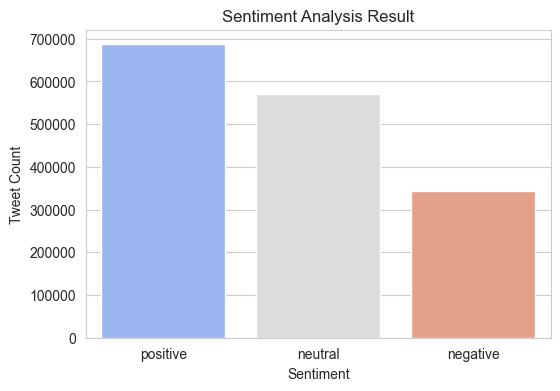

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='analysis', order=['positive', 'neutral', 'negative'], palette='coolwarm')
plt.title("Sentiment Analysis Result")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [8]:
from wordcloud import WordCloud

# Generate word cloud for positive tweets
positive_text = " ".join(df[df['analysis'] == 'positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Tweets")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [9]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


📌 Visualizing Positive Tweets with a Word Cloud
In this section, we generate a Word Cloud to visualize the most frequently occurring words in the positive sentiment tweets.

A Word Cloud helps us quickly identify key terms and common language patterns used in tweets with a positive tone.

We use:

=>TextBlob for sentiment polarity.

=>pandas for data filtering.

=>WordCloud from wordcloud package to generate the cloud.

=>matplotlib for displaying it.

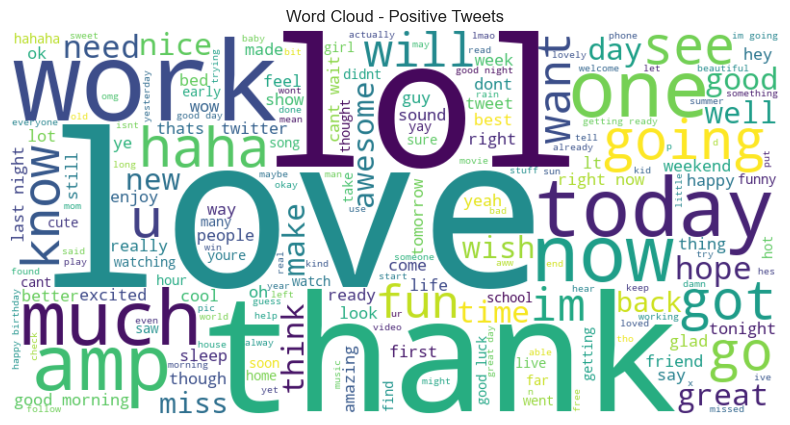

In [10]:
from wordcloud import WordCloud


positive_text = " ".join(df[df['analysis'] == 'positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Tweets")
plt.show()


C:\Users\nafis\AppData\Local\Temp\ipykernel_2548\375868525.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='analysis', palette='Set2', order=['positive', 'neutral', 'negative'])


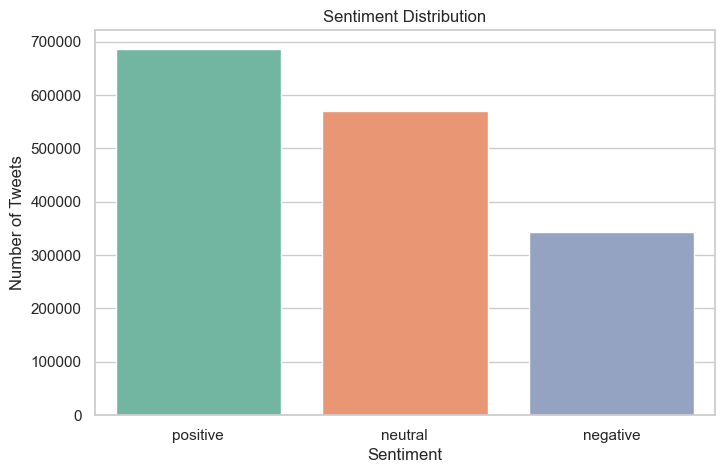

In [11]:
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='analysis', palette='Set2', order=['positive', 'neutral', 'negative'])

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()
